# Identifying perfectly correlated features
## This notebook is supplementary to the notebook called Experiment
Load the features

In [1]:
from package import dataHandler as dh
from os.path import join
import matplotlib.pyplot as plt
from package import featureHandler as fh

features = dh.pickleLoad(path=join('Results','features.pickle'))
features = dh.pickleLoad(path=join('Results','features_lowpass20hz.pickle'))

base_feature_names,visual_feature_names = fh.get_feature_names()

Inspecting the correlations for one of the frequencies. Let us use 10 Hz

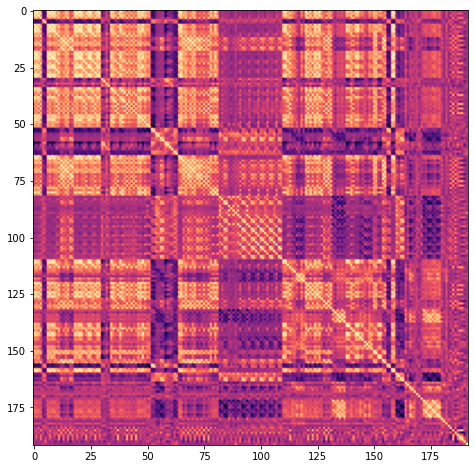

In [2]:
corr = features['10 Hz'].corr()
plt.figure(figsize=[8,8])
plt.imshow(corr,cmap='magma')
plt.show()

Now lets look at all sampling frequencies. We will pick up any features that are more than 0.9999 correlated

In [3]:
corrs = {}

for fs_key in features.keys():
    corr = features[fs_key].corr()
    corr = corr.unstack()
    correlated = corr.loc[(corr > 0.9999)|(corr < -0.9999)]
    correlated_features = []
    for f1,f2 in correlated.index:
        if (f1 != f2) and ((f1,f2) not in correlated_features) and ((f2,f1) not in correlated_features):
            #if the features arent the same, and not already in the list
            correlated_features.append((f1,f2))

    corrs[fs_key] = (list(correlated_features))

if sum([list(corrs.values()).count(corr) for corr in corrs.values()]) == 16:
    print('All the correlated features are the same for all sampling frequencies')

#Removing the EO/EC suffix and tidying up
correlated_features_EOandEC = []
correlated_features_noEOEC = [(f1[:-3],f2[:-3]) for f1,f2 in correlated_features]
for f1,f2 in correlated_features_noEOEC:
    count = correlated_features_noEOEC.count((f1,f2)) + correlated_features_noEOEC.count((f2,f1))
    if (count == 2): 
        if ((f1,f2) not in correlated_features_EOandEC) and (f2,f1 not in correlated_features_EOandEC):
            correlated_features_EOandEC.append((f1,f2))
    else:
        print('Something wrong: these features appear for only either EO or EC',f1,f2)

correlated_features_EOandEC

All the correlated features are the same for all sampling frequencies


[('area90_ML', 'rms_displacement_ML'),
 ('area90_ML', 'std_displacement_ML'),
 ('area90_AP', 'rms_displacement_AP'),
 ('area90_AP', 'std_displacement_AP'),
 ('pathlength', 'avg_velocity'),
 ('pathlength', 'swayvector_length'),
 ('pathlength_ML', 'avg_velocity_ML'),
 ('pathlength_AP', 'avg_velocity_AP'),
 ('rms_displacement', 'planardeviation'),
 ('rms_displacement_ML', 'std_displacement_ML'),
 ('rms_displacement_AP', 'std_displacement_AP'),
 ('avg_displacement', 'avg_radius'),
 ('avg_velocity', 'swayvector_length')]

In [4]:
#Theres quite a few. To get rid of these perfect correlations, we remove: 
features_to_remove = ['std_displacement_ML',
                      'std_displacement_AP',
                      'planardeviation',
                      'avg_velocity_AP',
                      'avg_velocity_ML',
                      'area90_AP',
                      'area90_ML',
                      'swayvector_length',
                      'avg_radius',
                      'avg_velocity']

#Remove it from base_feature_names
for name in features_to_remove: base_feature_names.remove(name)
    
features_to_remove = [f+'_EO' for f in features_to_remove] + [f+'_EC' for f in features_to_remove] #include back EO/EC

for fs_key in features.keys():
    ind = features[fs_key].columns.isin(features_to_remove)
    features[fs_key] = features[fs_key].loc[:,~ind]


In [5]:
corrs = {}
for fs_key in features.keys():
    #Check:
    corr = features[fs_key].corr()
    corr = corr.unstack()
    correlated = corr.loc[(corr > 0.9999)|(corr < -0.9999)]
    correlated_features = []
    for f1,f2 in correlated.index:
        if (f1 != f2) and ((f1,f2) not in correlated_features) and ((f2,f1) not in correlated_features):
            #if the features arent the same, and not already in the list
            correlated_features.append((f1,f2))

    corrs[fs_key] = (list(correlated_features))
corrs

{'10 Hz': [], '20 Hz': [], '40 Hz': [], '100 Hz': []}

Empty, so all perfectly correlated features are removed